- Step 1: Load the datasets

In [1]:
import pandas as pd

fraud_df = pd.read_csv(r"C:\Users\bezis\Downloads\fraud-detection\fraud-detection\data\raw\Fraud_Data.csv")
ip_df = pd.read_csv(r"C:\Users\bezis\Downloads\fraud-detection\fraud-detection\data\raw\IpAddress_to_Country.csv")
credit_df = pd.read_csv(r"C:\Users\bezis\Downloads\fraud-detection\fraud-detection\data\raw\creditcard.csv")


- Step 2: Explore the data

In [2]:
fraud_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [3]:

fraud_df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [4]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
fraud_df.isnull().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [6]:
fraud_df.drop_duplicates(inplace=True)


- Step 3: Correct data types

In [7]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])


In [8]:
fraud_df['purchase_value'] = pd.to_numeric(fraud_df['purchase_value'], errors='coerce')
fraud_df['age'] = pd.to_numeric(fraud_df['age'], errors='coerce')


- Step 4: Exploratory Data Analysis (EDA)

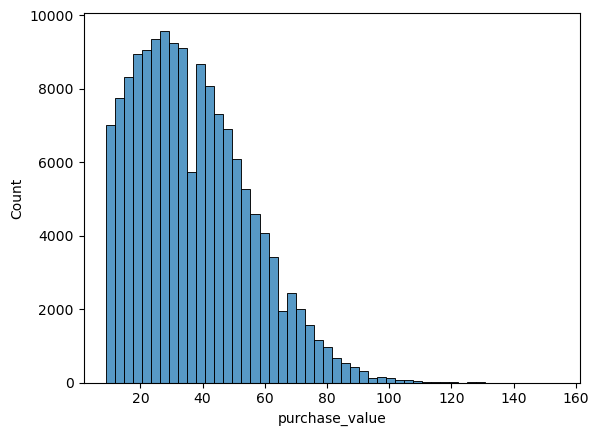

In [9]:
# Univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(fraud_df['purchase_value'], bins=50)
plt.show()


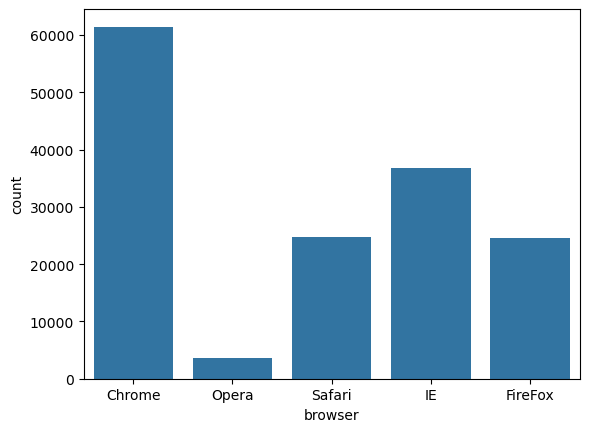

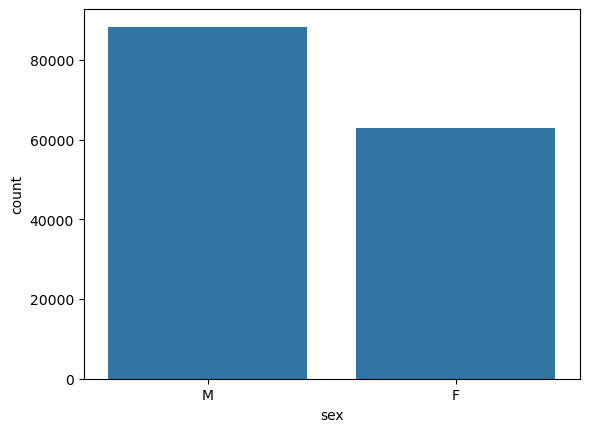

In [10]:
# Categorical features
sns.countplot(x='browser', data=fraud_df)
plt.show()
sns.countplot(x='sex', data=fraud_df)
plt.show()


In [11]:
# Target variable
fraud_df['class'].value_counts(normalize=True)


class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

## Step 4 Analysis: Key Insights from E-Commerce Dataset

Based on the charts and the target variable proportions, we can generalize several key insights about the dataset. This is typical of an e-commerce or fraud detection dataset where user behavior is analyzed.

### 1. Demographic & Tooling Bias (Univariate Categorical)

**Gender (Sex):**  
- There is a higher representation of Male (M) users compared to Female (F) users.  
- Both groups are significant, but models may slightly favor patterns from the male demographic.

**Browser Preference:**  
- Chrome is the dominant browser (>60,000 counts).  
- Internet Explorer (IE) is second, while Safari and Firefox are lower.  
- Opera is a very small minority.

**Data Science Implication:**  
- Browser-specific behavior might be an important feature for fraud detection.  
- Check if certain browsers show higher fraud rates relative to their volume.

---

### 2. Purchase Behavior (Univariate Continuous)

**Purchase Value:**  
- Right-skewed distribution: Most purchases are concentrated in the low-to-mid range ($20–$50).  
- Mode around $30.  
- Outliers: Higher-priced purchases (> $80) are rare, with a long tail up to ~$160.

**Data Science Implication:**  
- High-value purchases are rare.  
- Extremely high or "round number" purchases may indicate suspicious activity.  
- Consider log-transformation or scaling for models sensitive to skewed distributions.

---

### 3. Target Variable Imbalance

**Class Proportions:**  
- Class 0 (Non-fraud): 90.6%  
- Class 1 (Fraud): 9.3%

**Data Science Implication:**  
- Highly imbalanced dataset; accuracy is not a reliable metric.  
- Models need to focus on **Precision, Recall, F1-Score**.  
- Sampling techniques (e.g., SMOTE) or specialized loss functions are recommended.

---

### Summary Table

| Feature       | Primary Observation           | Data Science Implication                                     |
|---------------|-------------------------------|--------------------------------------------------------------|
| Sex           | More Males than Females       | Check for demographic bias in target outcomes.             |
| Browser       | Chrome Dominance              | Browser-specific behavior might be a strong feature.       |
| Purchase Value| Skewed towards $30            | Consider log-transformation or scaling for some models.    |
| Target Proportions | 90% vs 9% Imbalance       | Requires sampling techniques (SMOTE) or specialized loss functions. |


- Step 5: Geolocation Integration

In [12]:
print(fraud_df['ip_address'].dtype)
print(fraud_df['ip_address'].head())


float64
0    7.327584e+08
1    3.503114e+08
2    2.621474e+09
3    3.840542e+09
4    4.155831e+08
Name: ip_address, dtype: float64


In [13]:
# Convert float IP to integer
fraud_df['ip_int'] = fraud_df['ip_address'].astype('int64')


In [14]:
# Prepare the IP ranges in the mapping dataset
ip_df['lower_int'] = ip_df['lower_bound_ip_address'].astype('int64')
ip_df['upper_int'] = ip_df['upper_bound_ip_address'].astype('int64')


In [15]:
# Ensure IPs are integers
fraud_df['ip_int'] = fraud_df['ip_address'].astype('int64')
ip_df['lower_int'] = ip_df['lower_bound_ip_address'].astype('int64')
ip_df['upper_int'] = ip_df['upper_bound_ip_address'].astype('int64')

# Sort
fraud_df = fraud_df.sort_values('ip_int')
ip_df = ip_df.sort_values('lower_int')


In [16]:
# Merge closest lower bound
merged_df = pd.merge_asof(
    fraud_df,
    ip_df,
    left_on='ip_int',
    right_on='lower_int',
    direction='backward'
)


In [17]:
# Keep only IPs that actually fall within the range
merged_df = merged_df[
    (merged_df['ip_int'] >= merged_df['lower_int']) & 
    (merged_df['ip_int'] <= merged_df['upper_int'])
]

# Keep only relevant columns
fraud_df = merged_df[['user_id', 'signup_time', 'purchase_time', 'purchase_value',
                      'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 
                      'class', 'country']]


- Step 6: Feature Engineering

In [21]:
import numpy as np

# Make sure sorted by user and purchase_time
fraud_df = fraud_df.sort_values(['user_id', 'purchase_time']).copy()

# Group by user
groups = fraud_df.groupby('user_id').indices  # dict: user_id -> row indices

tx_count_last_24h = np.zeros(len(fraud_df), dtype=int)

for user_id, idx in groups.items():
    times = fraud_df.loc[idx, 'purchase_time'].values
    start = 0
    for i in range(len(times)):
        while times[start] < times[i] - np.timedelta64(24, 'h'):
            start += 1
        tx_count_last_24h[idx[i]] = i - start  # exclude current tx

fraud_df['tx_count_last_24h'] = tx_count_last_24h


- Step 7:Data Transformation

In [28]:
# Normalize numeric features (optional at this stage)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fraud_df[['purchase_value', 'time_since_signup']] = scaler.fit_transform(fraud_df[['purchase_value', 'time_since_signup']])


C:\Users\bezis\AppData\Local\Temp\ipykernel_30652\366625421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df[['purchase_value', 'time_since_signup']] = scaler.fit_transform(fraud_df[['purchase_value', 'time_since_signup']])


In [29]:
# Encode categorical features:
fraud_df = pd.get_dummies(fraud_df, columns=['browser', 'source', 'sex'])


- Step 8: Handle Class Imbalance

In [25]:
# Keep only numeric columns
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])


In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_numeric, y_train)


In [27]:
import pandas as pd
print("Before SMOTE:")
print(y_train.value_counts())
print("After SMOTE:")
print(pd.Series(y_res).value_counts())


Before SMOTE:
class
0    93502
1     9814
Name: count, dtype: int64
After SMOTE:
class
0    93502
1    93502
Name: count, dtype: int64
